# **Case Study: Electric and Autonomous Vehicles**
## **1. Introduction**
Electric and Autonomous Vehicles represent a pivotal shift in the automotive industry, heralding a future of cleaner, safer, and more efficient transportation. This case study delves into the realm of electric vehicles (EVs), which are at the forefront of this transformation. By analyzing real-world data, we seek to uncover the current trends, preferences, and distribution of EVs, offering insights into their adoption and the evolving landscape of personal and public transportation.
## **2. Meta Data (Data Description)**
The dataset comprises various attributes of electric vehicles. Key columns include:
\- VIN (Vehicle Identification Number): A unique code for each vehicle.
\- County, City, State: Geographical location of the vehicle.
\- Model Year, Make, and Model: Details of the vehicle's make and model.
\- Electric Vehicle Type: Specifies whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).
\- Electric Range: The distance the vehicle can travel on electric power alone.
\- Base MSRP: Manufacturer's Suggested Retail Price.
\- Vehicle Location: Geographical coordinates of the vehicle.
## **3. Objective and Questions of the Case Study**
The primary objective of this case study is to analyze the current state of electric vehicles, focusing on their distribution, preferences, and trends. Key questions include:
\- What are the prevalent trends in electric vehicle adoption?
\- How does the distribution of electric vehicles vary geographically?
\- What are the most common types and models of electric vehicles in use?
## **4. Approach**
The approach to this analysis involves:
\- Comprehensive data cleaning and preprocessing.
\- Descriptive statistical analysis to understand basic trends and distributions.
\- Visualization of data to interpret geographical distribution and trends over time.
\- Comparative analysis of different makes and models of EVs.
## **5. Conclusion and Summary**
In conclusion, this case study provides valuable insights into the electric vehicle market. The findings highlight significant trends in EV adoption and reveal preferences in vehicle types and models. The geographic distribution analysis sheds light on regional disparities in EV usage. These insights are crucial for stakeholders in the automotive industry, policymakers, and environmental advocates to understand the dynamics of EV adoption and guide future decisions in the realm of sustainable transportation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


Drop few columns that are not important for our study such as VIN,POSTAL CODE,BASE MSRP,LEGISLATICE DISTRICT,DOL VEHICLE ID,ELECTIRIC UTILITY,2020 CENSUS TRACT

In [ ]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [ ]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,Monroe,Key West,FL,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-81.80023 24.5545)
1,Clark,Laughlin,NV,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,POINT (-114.57245 35.16815)
2,Yakima,Yakima,WA,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,POINT (-120.50721 46.60448)
3,Skagit,Concrete,WA,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,POINT (-121.7515 48.53892)
4,Snohomish,Everett,WA,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,POINT (-122.20596 47.97659)


In [ ]:
df.shape

(112634, 10)

In [ ]:
df.isna().sum()

County                                                0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                20
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Vehicle Location                                     24
dtype: int64

A very few data points are missing so we can remove them

In [ ]:
df = df.dropna()

In [ ]:
#Lets check from which county we have more entries from (Top 10)

Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

<ipython-input-24-a98b015fb44d>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




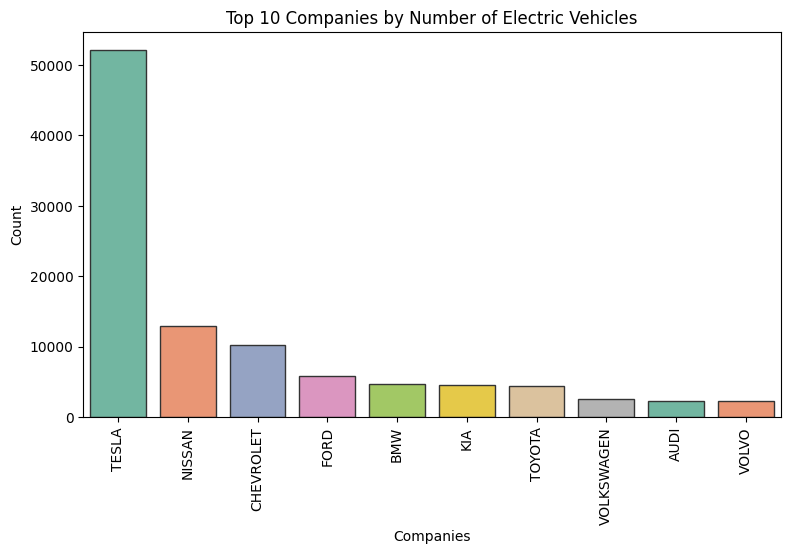

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'df'
# df = pd.DataFrame(...)  # Make sure your df is defined and has the required columns

# Check if necessary columns exist in DataFrame
if 'Make' in df.columns and 'City' in df.columns:
    # Group, count, and sort data
    grouped_data = df.groupby('Make')['City'].count().sort_values(ascending=False)

    # Select top 10 companies
    top_companies = grouped_data.head(10).index
    top_values = grouped_data.head(10).values

    # Create the bar plot
    plt.figure(figsize=(9, 5))
    sns.barplot(x=top_companies, y=top_values, edgecolor='.2', palette='Set2')
    plt.xticks(rotation=90)
    plt.xlabel('Companies')
    plt.ylabel('Count')
    plt.title('Top 10 Companies by Number of Electric Vehicles')
    plt.show()
else:
    print("Error: DataFrame does not contain the required columns 'Make' and 'City'")


In [ ]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

<ipython-input-28-0ed1341ca645>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




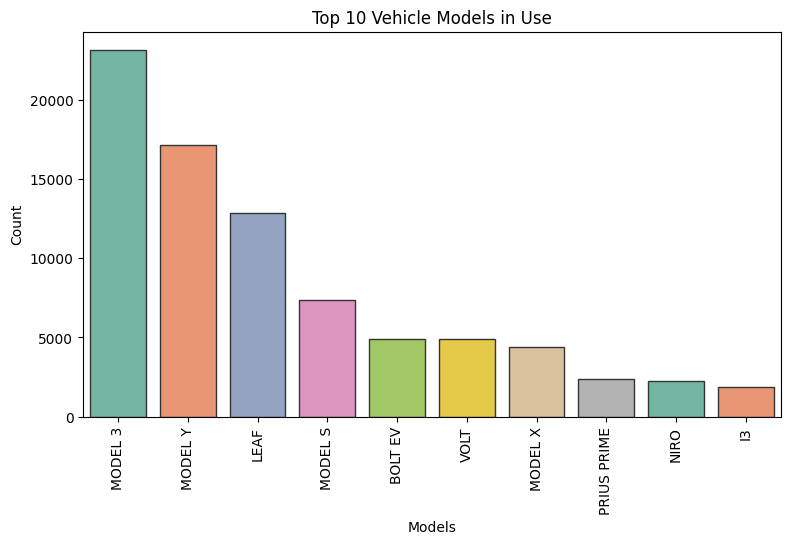

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'Model' and 'City'

# Check if necessary columns exist in DataFrame
if 'Model' in df.columns and 'City' in df.columns:
    # Group, count, and sort data
    grouped_data = df.groupby('Model')['City'].count().sort_values(ascending=False)

    # Select top 10 models
    top_models = grouped_data.head(10).index
    top_values = grouped_data.head(10).values

    # Create the bar plot
    plt.figure(figsize=(9, 5))
    sns.barplot(x=top_models, y=top_values, edgecolor='.2', palette='Set2')
    plt.xticks(rotation=90)
    plt.xlabel('Models')
    plt.ylabel('Count')
    plt.title('Top 10 Vehicle Models in Use')
    plt.show()
else:
    print("Error: DataFrame does not contain the required columns 'Model' and 'City'")


In [ ]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> FUSION
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


In [ ]:
#Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

In [ ]:
#lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

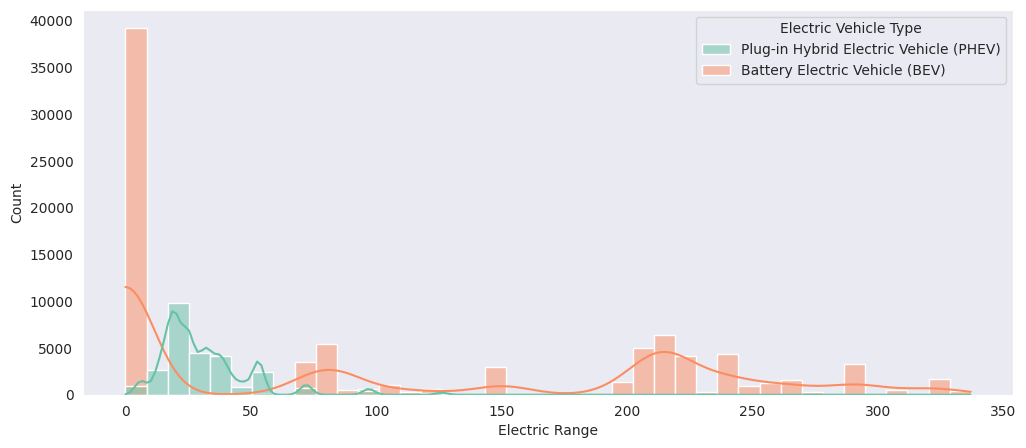

In [ ]:
#lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

In [ ]:
#the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV

In [ ]:
df[df['Electric Range']==0].shape

(39213, 10)

<ipython-input-35-04af98b766f3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

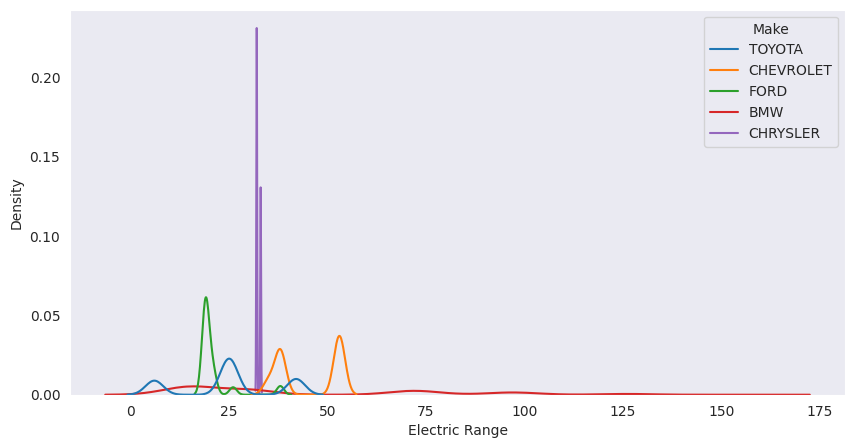

In [ ]:
#lets filter out top 5 companies as per each electric vehicle type

#PHEV

data_phev = df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_phev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x:1 if x in companies else 0 )
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_phev)

<ipython-input-36-2791e985e4d4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

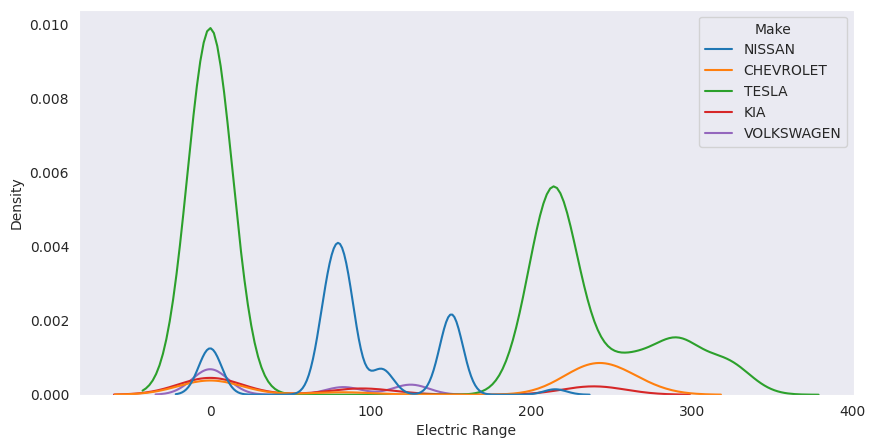

In [ ]:
#BEV


data_bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0 )
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_bev)

In [ ]:
#if we remove zero ranges we can see CHEVERLET AND TESLA offering high ranges

In [ ]:
#lets see top20 most sold cars and top20 most range giving vehicles and check if there is any correlation

In [ ]:
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

In [ ]:
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

In [ ]:
top_10_vehicles

['MODEL 3',
 'MODEL Y',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'VOLT',
 'MODEL X',
 'PRIUS PRIME',
 'NIRO',
 'I3']

In [ ]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

In [ ]:
#6 out of top 10 most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales

<Axes: xlabel='Model Year', ylabel='count'>

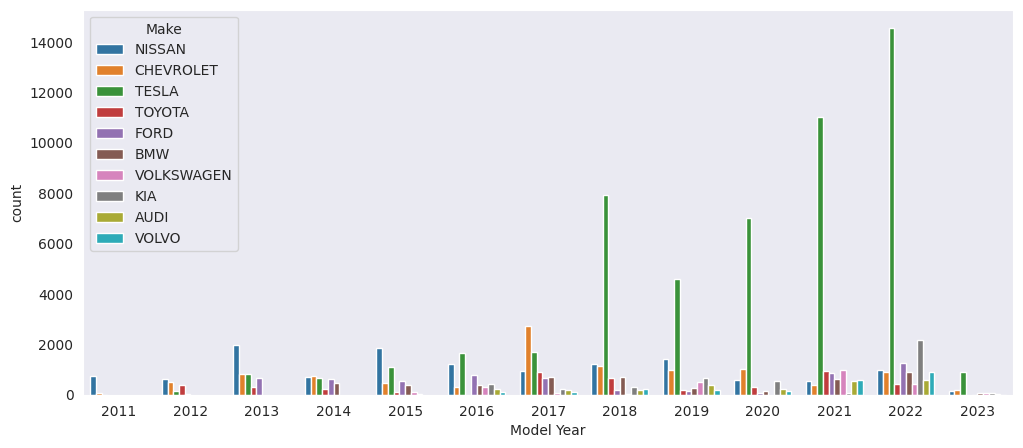

In [ ]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

In [ ]:
#earlier NISSAN and CHEVY used to have hold of the market then TESLA took over it

In [ ]:
#if we study an individual company TESLA
#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

<Axes: >

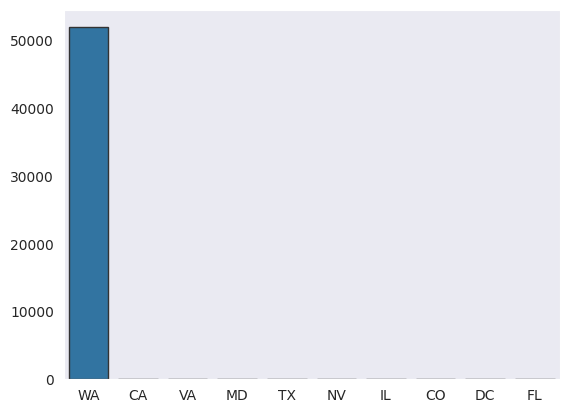

In [ ]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

In [ ]:
values

[51943, 39, 17, 10, 9, 5, 4, 4, 3, 3]

In [ ]:
#Most of the Tesla vehicles are from 'WA' state

<Axes: >

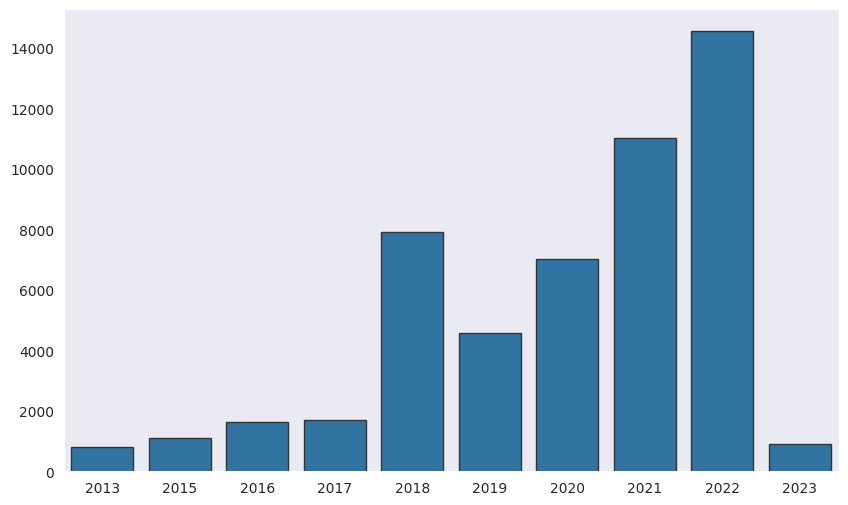

In [ ]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

In [ ]:
#most models are from 2022 which are sold by tesla

(20.0, 60.0)

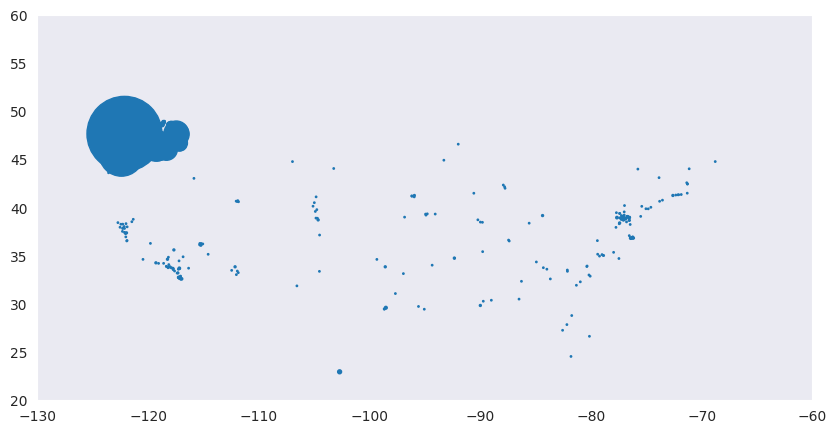

In [ ]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)

In [ ]:
#Most data points are from 'WA' state

In [ ]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

(20.0, 50.0)

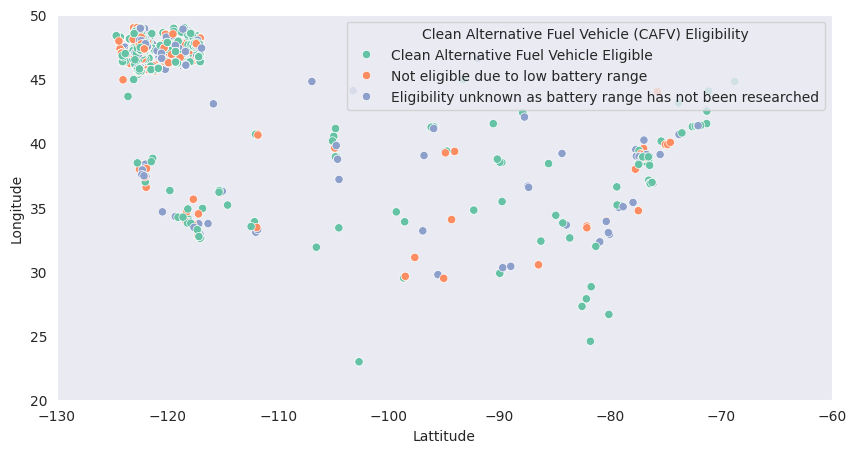

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='Set2')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [ ]:
#density is more at certain regions of the map and distribution of CAFV can be seen

(20.0, 50.0)

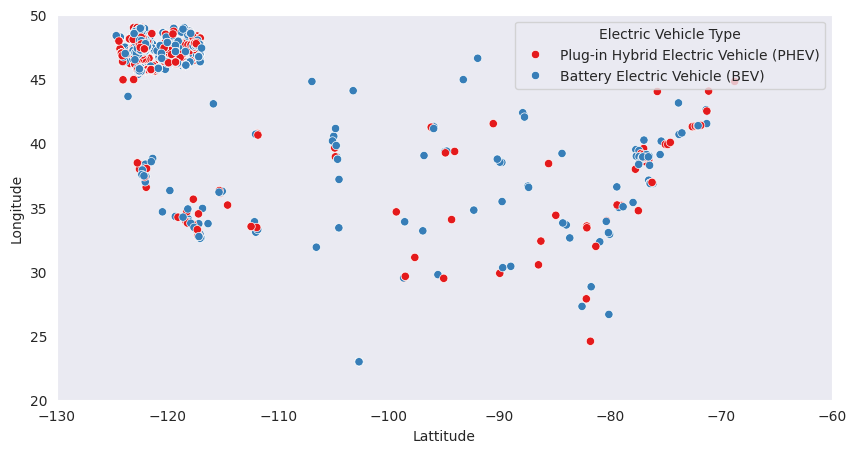

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [ ]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [ ]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [ ]:
data = data.reset_index()

In [ ]:
data.columns = ['State','Count']

In [ ]:
fig = px.choropleth(data,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="greens",
                    scope="usa")

fig.show()